In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install Autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
get = pd.read_csv('/content/validation_index.csv')
drop_idx = get[get['label']==3]
get.drop(['type'],axis=1,inplace=True)
test = pd.read_csv('/content/drive/MyDrive/공기압축기/test_data.csv')
test_z = test.copy()
test_z = pd.concat([test_z,get],axis=1)
train_abnor = test_z[(test_z['label'] == 1) | (test_z['label'] == 3)]
#train_abnor = test_z[(test_z['label'] == 3)]
train_abnor['label'][train_abnor['label'] == 3] = 1
train_abnor

<ipython-input-64-012d4ea4e37e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_abnor['label'][train_abnor['label'] == 3] = 1
<ipython-input-64-012d4ea4e37e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_abnor['label'][train_abnor['label'] == 3] = 1


,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
585,1.38,41.64,0.7,21.10,1651.0,58.34,3.12,0,1
586,2.06,51.95,0.7,31.64,2476.0,59.34,3.58,0,1
587,1.35,41.20,0.7,20.65,1616.0,60.34,3.10,0,1
588,2.86,63.93,0.7,43.88,3434.0,61.34,4.11,0,1
589,1.62,45.26,0.7,24.80,1941.0,62.34,3.28,0,1
...,...,...,...,...,...,...,...,...,...
7356,3.32,63.98,0.7,43.00,3518.0,79.09,3.95,7,1
7357,2.30,50.50,0.7,29.82,2440.0,67.11,3.36,7,1
7358,1.70,42.49,0.7,21.99,1799.0,59.99,3.00,7,1
7359,1.48,43.15,0.7,22.64,1772.0,59.69,3.18,7,1


In [65]:
train_nor = pd.read_csv('/content/drive/MyDrive/공기압축기/train_data.csv')
train_nor['label'] = 0
#train_abnor = pd.read_csv('/content/Abnormal.csv')
train = pd.concat([train_nor, train_abnor],axis=0)
test = pd.read_csv('/content/drive/MyDrive/공기압축기/test_data.csv')
train = train.reset_index(drop=True)
train

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,0
...,...,...,...,...,...,...,...,...,...
2817,3.32,63.98,0.7,43.00,3518.0,79.09,3.95,7,1
2818,2.30,50.50,0.7,29.82,2440.0,67.11,3.36,7,1
2819,1.70,42.49,0.7,21.99,1799.0,59.99,3.00,7,1
2820,1.48,43.15,0.7,22.64,1772.0,59.69,3.18,7,1


# FE

In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 가정: train과 test는 이미 로드된 Pandas DataFrame이라고 가정합니다.

# 원-핫 인코더 객체 생성
encoder = OneHotEncoder(sparse=False)

# train과 test의 'type' 피처 원-핫 인코딩
train_type_encoded = pd.DataFrame(encoder.fit_transform(train[['type']]), columns=encoder.get_feature_names_out(['type']))
test_type_encoded = pd.DataFrame(encoder.transform(test[['type']]), columns=encoder.get_feature_names_out(['type']))

# 인덱스 재설정 (원본 데이터와 결합시 인덱스 문제를 방지하기 위함)
train_type_encoded.reset_index(drop=True, inplace=True)
test_type_encoded.reset_index(drop=True, inplace=True)

# 기존 데이터에 원-핫 인코딩된 피처 추가
train = pd.concat([train.drop(['type'], axis=1), train_type_encoded], axis=1)
test = pd.concat([test.drop(['type'], axis=1), test_type_encoded], axis=1)

print(train.head())
print(test.head())


   air_inflow  air_end_temp  out_pressure  motor_current  motor_rpm  \
0        1.59         41.00           0.7          20.53     1680.0   
1        2.97         59.28           0.7          38.40     3142.0   
2        1.91         45.29           0.7          24.73     2023.0   
3        2.37         51.33           0.7          30.63     2506.0   
4        1.90         45.21           0.7          24.65     2017.0   

   motor_temp  motor_vibe  label  type_0  type_1  type_2  type_3  type_4  \
0       58.67        2.93      0     1.0     0.0     0.0     0.0     0.0   
1       74.91        3.75      0     1.0     0.0     0.0     0.0     0.0   
2       62.48        3.12      0     1.0     0.0     0.0     0.0     0.0   
3       67.84        3.39      0     1.0     0.0     0.0     0.0     0.0   
4       62.41        3.12      0     1.0     0.0     0.0     0.0     0.0   

   type_5  type_6  type_7  
0     0.0     0.0     0.0  
1     0.0     0.0     0.0  
2     0.0     0.0     0.0  
3   

In [66]:
# 파생 변수 생성: 온도와 전류의 관계
train['temp_current_ratio'] = train['motor_temp'] / train['motor_current']
train['temp_current_product'] = train['motor_temp'] * train['motor_current']

# 파생 변수 생성: 회전수와 진동의 관계
train['rotation_vibration_ratio'] = train['motor_rpm'] / train['motor_vibe']
train['rotation_vibration_product'] = train['motor_rpm'] * train['motor_vibe']

# 파생 변수 생성: 전류와 회전수의 관계
train['current_rotation_ratio'] = train['motor_current'] / train['motor_rpm']
train['current_rotation_product'] = train['motor_current'] * train['motor_rpm']

# 파생 변수 생성: 온도와 회전수의 관계
train['temp_rotation_ratio'] = train['motor_temp'] / train['motor_rpm']
train['temp_rotation_product'] = train['motor_temp'] * train['motor_rpm']

# 파생 변수 생성: 전류와 진동의 관계
train['current_vibration_ratio'] = train['motor_current'] / train['motor_vibe']
train['current_vibration_product'] = train['motor_current'] * train['motor_vibe']



# 파생 변수 생성: 온도와 전류의 관계
test['temp_current_ratio'] = test['motor_temp'] / test['motor_current']
test['temp_current_product'] = test['motor_temp'] * test['motor_current']

# 파생 변수 생성: 회전수와 진동의 관계
test['rotation_vibration_ratio'] = test['motor_rpm'] / test['motor_vibe']
test['rotation_vibration_product'] = test['motor_rpm'] * test['motor_vibe']

# 파생 변수 생성: 전류와 회전수의 관계
test['current_rotation_ratio'] = test['motor_current'] / test['motor_rpm']
test['current_rotation_product'] = test['motor_current'] * test['motor_rpm']

# 파생 변수 생성: 온도와 회전수의 관계
test['temp_rotation_ratio'] = test['motor_temp'] / test['motor_rpm']
test['temp_rotation_product'] = test['motor_temp'] * test['motor_rpm']

# 파생 변수 생성: 전류와 진동의 관계
test['current_vibration_ratio'] = test['motor_current'] / test['motor_vibe']
test['current_vibration_product'] = test['motor_current'] * test['motor_vibe']

from sklearn.decomposition import PCA
def pca_with_selected_features(train, test, features, n_components):
    # 원하는 피처들만 선택
    train_selected = train[features]
    test_selected = test[features]
    # PCA 모델 생성 및 학습
    pca = PCA(n_components=n_components)
    pca.fit(train_selected)

    # 변환된 데이터 반환
    train_transformed = pca.transform(train_selected)
    test_transformed = pca.transform(test_selected)
    return train_transformed, test_transformed



# x1과 x3 피처만 선택하고 2차원으로 축소
train_transformed_air, test_transformed_air  = pca_with_selected_features(train,test, ['air_inflow', 'air_end_temp'], 1)

train_transformed_air = pd.DataFrame(train_transformed_air, columns = ['air_PCA'])
test_transformed_air = pd.DataFrame(test_transformed_air, columns = ['air_PCA'])

train_transformed, test_transformed  = pca_with_selected_features(train,test, ['motor_current', 'motor_rpm', 'motor_temp','motor_vibe'], 1)
#train_transformed, test_transformed  = pca_with_selected_features(train,test, ['motor_current', 'motor_rpm', 'motor_temp'], 1)

train_transformed_motor = pd.DataFrame(train_transformed, columns = ['motor_PCA'])
test_transformed_motor = pd.DataFrame(test_transformed, columns = ['motor_PCA'])


#train_transformed_tem, test_transformed_tem  = pca_with_selected_features(train,test, ['air_end_temp', 'motor_temp'], 1)

#train_transformed_tem = pd.DataFrame(train_transformed_tem, columns = ['airT_PCA'])
#test_transformed_tem = pd.DataFrame(test_transformed_tem, columns = ['airT_PCA'])

#train = train.drop(train.filter(regex='air').columns, axis=1)
#train = train.drop(train.filter(regex='motor').columns, axis=1)

#test = test.drop(test.filter(regex='air').columns, axis=1)
#test = test.drop(test.filter(regex='motor').columns, axis=1)

train = pd.concat([train,train_transformed_air,train_transformed_motor],axis=1)
test = pd.concat([test,test_transformed_air,test_transformed_motor],axis=1)

In [67]:
train['type'][(train['type'] == 0) | (train['type'] == 4) | (train['type'] == 5) | (train['type'] == 6) | (train['type'] == 7)] = 0
train0 = train[train['type'] == 0] ################### 10
train1 = train[train['type'] == 1]
train2 = train[train['type'] == 2]
train3 = train[train['type'] == 3]


test0 = test[test['type'] == 0]
test1 = test[test['type'] == 1]
test2 = test[test['type'] == 2]
test3 = test[test['type'] == 3]
test4 = test[test['type'] == 4]
test5 = test[test['type'] == 5]
test6 = test[test['type'] == 6]
test7 = test[test['type'] == 7]
'''
# 데이터 표준화
data_mean = train0.mean()
data_sd = train0.std()
train0_sc = train0.copy()
test0_sc = test0.copy()
test4_sc = test4.copy()
test5_sc = test5.copy()
test6_sc = test6.copy()
test7_sc = test7.copy()
train0 = (train0 - data_mean) / data_sd
test0 = (test0 - data_mean) / data_sd
test4 = (test4 - data_mean) / data_sd
test5 = (test5 - data_mean) / data_sd
test6 = (test6 - data_mean) / data_sd
test7 = (test7 - data_mean) / data_sd
train0['type'] = train0_sc['type']
test0['type'] = test0_sc['type']
test4['type'] = test4_sc['type']
test5['type'] = test5_sc['type']
test6['type'] = test6_sc['type']
test7['type'] = test7_sc['type']

data_mean = train1.mean()
data_sd = train1.std()
train1_sc = train1.copy()
test1_sc = test1.copy()
train1 = (train1 - data_mean) / data_sd
test1 = (test1 - data_mean) / data_sd
train1['type'] = train1_sc['type']
test1['type'] = test1_sc['type']


data_mean = train2.mean()
data_sd = train2.std()
train2_sc = train2.copy()
test2_sc = test2.copy()
train2 = (train2 - data_mean) / data_sd
test2 = (test2 - data_mean) / data_sd
train2['type'] = train2_sc['type']
test2['type'] = test2_sc['type']

data_mean = train3.mean()
data_sd = train3.std()
train3_sc = train3.copy()
test3_sc = test3.copy()
train3 = (train3 - data_mean) / data_sd
test3 = (test3 - data_mean) / data_sd
train3['type'] = train3_sc['type']
test3['type'] = test3_sc['type']
'''

train0.drop(['type','out_pressure'],axis=1,inplace=True)
train1.drop(['type','out_pressure'],axis=1,inplace=True)
train2.drop(['type','out_pressure'],axis=1,inplace=True)
train3.drop(['type','out_pressure'],axis=1,inplace=True)

test0.drop(['type','out_pressure'],axis=1,inplace=True)
test1.drop(['type','out_pressure'],axis=1,inplace=True)
test2.drop(['type','out_pressure'],axis=1,inplace=True)
test3.drop(['type','out_pressure'],axis=1,inplace=True)
test4.drop(['type','out_pressure'],axis=1,inplace=True)
test5.drop(['type','out_pressure'],axis=1,inplace=True)
test6.drop(['type','out_pressure'],axis=1,inplace=True)
test7.drop(['type','out_pressure'],axis=1,inplace=True)

<ipython-input-67-1bfd9b88590a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['type'][(train['type'] == 0) | (train['type'] == 4) | (train['type'] == 5) | (train['type'] == 6) | (train['type'] == 7)] = 0
<ipython-input-67-1bfd9b88590a>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train0.drop(['type','out_pressure'],axis=1,inplace=True)
<ipython-input-67-1bfd9b88590a>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train

# Modeling

In [68]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, train_test_split

#train_xy = train_xy.reset_index()
train_data0 = TabularDataset(train0)
test_data0 = TabularDataset(test0)
test_data4 = TabularDataset(test4)
test_data5 = TabularDataset(test5)
test_data6 = TabularDataset(test6)
test_data7 = TabularDataset(test7)

train_data1 = TabularDataset(train1)
test_data1 = TabularDataset(test1)
train_data2 = TabularDataset(train2)
test_data2 = TabularDataset(test2)
train_data3 = TabularDataset(train3)
test_data3 = TabularDataset(test3)
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
#그룹을 프로덕트 코드로 하면 성능 향상
predictor = TabularPredictor(label='label',  eval_metric='f1_macro').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class',  eval_metric='f1_macro',groups = 'PRODUCT_CODE', sample_weight = 'auto_weight').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class', eval_metric='f1_macro').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0},
#    num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
#    hyperparameters = {'NN_TORCH': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},  # last  argument is just for quick demo here, omit it in real applications
#)
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
predictions = predictor.predict(test_data)
print("==================predictor_complete========================")

No path specified. Models will be saved in: "AutogluonModels/ag-20230410_075417/"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230410_075417/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    2478
Train Data Columns: 27
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess th

==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 8 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Useless Original Features (Count: 1): ['out_pressure']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 26 | ['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 18 | ['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', ...]
		('int', ['bool']) :  8 | ['type_0', 'type_1', 'type_2', 'type_3', 'ty

==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================predictor_complete========================


In [76]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, train_test_split

#train_xy = train_xy.reset_index()
train_data0 = TabularDataset(train0)
test_data0 = TabularDataset(test0)
test_data4 = TabularDataset(test4)
test_data5 = TabularDataset(test5)
test_data6 = TabularDataset(test6)
test_data7 = TabularDataset(test7)

train_data1 = TabularDataset(train1)
test_data1 = TabularDataset(test1)
train_data2 = TabularDataset(train2)
test_data2 = TabularDataset(test2)
train_data3 = TabularDataset(train3)
test_data3 = TabularDataset(test3)
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
#그룹을 프로덕트 코드로 하면 성능 향상
predictor = TabularPredictor(label='label',  eval_metric='f1_macro').fit(train_data0, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class',  eval_metric='f1_macro',groups = 'PRODUCT_CODE', sample_weight = 'auto_weight').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class', eval_metric='f1_macro').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0},
#    num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
#    hyperparameters = {'NN_TORCH': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},  # last  argument is just for quick demo here, omit it in real applications
#)
predictions0 = predictor.predict(test_data0)
predictions4 = predictor.predict(test_data4)
predictions5 = predictor.predict(test_data5)
predictions6 = predictor.predict(test_data6)
predictions7 = predictor.predict(test_data7)

predictor1 = TabularPredictor(label='label',  eval_metric='f1_macro').fit(train_data0, presets='high_quality',  ag_args_fit={'num_gpus': 0})
predictions1 = predictor.predict(test_data1)
predictor2 = TabularPredictor(label='label',  eval_metric='f1_macro').fit(train_data2, presets='high_quality',  ag_args_fit={'num_gpus': 0})
predictions2 = predictor.predict(test_data2)
predictor3 = TabularPredictor(label='label',  eval_metric='f1_macro').fit(train_data3, presets='high_quality',  ag_args_fit={'num_gpus': 0})
predictions3 = predictor.predict(test_data3)

No path specified. Models will be saved in: "AutogluonModels/ag-20230410_075727/"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230410_075727/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    1728
Train Data Columns: 18
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess th

==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================


Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10705.55 MB
	Train Data (Original)  Memory Usage: 0.25 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 18 | ['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', []) : 18 | ['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', ...]
	0.2s = Fit runtime
	18 features in original data used to generate 18 features in processed data.
	Train Data (Processed) Memor

In [77]:
predictions = pd.concat([predictions0,predictions1,predictions2,predictions3,predictions4,predictions5,predictions6,predictions7],axis=0)
predictions

0       0
1       0
2       0
3       0
4       0
       ..
7384    0
7385    0
7386    0
7387    0
7388    0
Name: label, Length: 7389, dtype: int64

In [78]:
predictions = pd.DataFrame(predictions, columns = ['label'])
proba = predictor.predict_proba(test_data)
proba = proba.to_numpy()
proba = pd.DataFrame(proba, columns = ['a', 'b'])
st = pd.concat([proba,predictions], axis=1)
st

,a,b,label
0,1.0000,0.0000,0
1,0.9820,0.0180,0
2,1.0000,0.0000,0
3,0.9880,0.0120,0
4,1.0000,0.0000,0
...,...,...,...
7384,1.0000,0.0000,0
7385,0.9980,0.0020,0
7386,1.0000,0.0000,0
7387,1.0000,0.0000,0


In [79]:
predictions00 = predictions[:1296]
predictions01 = predictions[1296:2403]
predictions02 = predictions[2403:3501]
predictions03 = predictions[3501:4419]
predictions04 = predictions[4419:5337]
predictions05 = predictions[5337:6083]
predictions06 = predictions[6083:6831]
predictions07 = predictions[6831:]

In [80]:
len(predictions[predictions['label'] == 1])

1205

In [81]:
print(len(train_abnor[train_abnor['type'] == 0]))
print(len(train_abnor[train_abnor['type'] == 1]))
print(len(train_abnor[train_abnor['type'] == 2]))
print(len(train_abnor[train_abnor['type'] == 3]))
print(len(train_abnor[train_abnor['type'] == 4]))
print(len(train_abnor[train_abnor['type'] == 5]))
print(len(train_abnor[train_abnor['type'] == 6]))
print(len(train_abnor[train_abnor['type'] == 7]))

143
0
27
26
13
30
101
19


In [82]:
print(len(predictions00[predictions00['label'] == 1]))
print(len(predictions01[predictions01['label'] == 1]))
print(len(predictions02[predictions02['label'] == 1]))
print(len(predictions03[predictions03['label'] == 1]))
print(len(predictions04[predictions04['label'] == 1]))
print(len(predictions05[predictions05['label'] == 1]))
print(len(predictions06[predictions06['label'] == 1]))
print(len(predictions07[predictions07['label'] == 1]))

144
0
0
918
7
29
102
5


In [37]:
predictions.to_csv('classfier.csv',index=False)

In [ ]:
import matplotlib.pyplot as plt
for i in range(8):
    pred_label = globals()[f'predictions0{i}']['label']
    #plt.figure(figsize=(8, 6))
    plt.plot(pred_label)
    plt.title(f'Labels for predictions0{i}')
    plt.xlabel('Index')
    plt.ylabel('Label')
    plt.show()

In [36]:
df1 = pd.read_csv('/content/jh_962.csv')
#df2 = pd.read_csv('/content/4.csv')
idx = (df1['label'].values != predictions['label'].values).nonzero()[0]
idx
#No FE

array([6867, 6942, 7088, 7213, 7238, 7308])

In [50]:
df1 = pd.read_csv('/content/jh_962.csv')
#df2 = pd.read_csv('/content/4.csv')
idx = (df1['label'].values != predictions['label'].values).nonzero()[0]
idx
#FE

array([2544, 6867, 7088, 7238])

In [ ]:
!pip install catboost

In [ ]:
from catboost import *

In [ ]:
model = CatBoostClassifier(random_state = 333)

In [ ]:
train_x = train.drop(['label'],axis=1)
train_y = train['label']

In [ ]:
model.fit(train_x,train_y)

In [ ]:
predictions = model.predict(test)
predictions = pd.DataFrame(predictions, columns = ['label'])
predictions

,label
0,0
1,0
2,0
3,0
4,0
...,...
7384,0
7385,0
7386,0
7387,0


In [ ]:
predictions00 = predictions[:1296]
predictions01 = predictions[1296:2403]
predictions02 = predictions[2403:3501]
predictions03 = predictions[3501:4419]
predictions04 = predictions[4419:5337]
predictions05 = predictions[5337:6083]
predictions06 = predictions[6083:6831]
predictions07 = predictions[6831:]

In [ ]:
print(len(predictions00[predictions00['label'] == 1]))
print(len(predictions01[predictions01['label'] == 1]))
print(len(predictions02[predictions02['label'] == 1]))
print(len(predictions03[predictions03['label'] == 1]))
print(len(predictions04[predictions04['label'] == 1]))
print(len(predictions05[predictions05['label'] == 1]))
print(len(predictions06[predictions06['label'] == 1]))
print(len(predictions07[predictions07['label'] == 1]))

143
0
23
25
12
29
102
7


# Pycaret

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requ

In [ ]:
!pip install numpy==1.20
from pycaret.classification import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.20.0 which is incompatible.
sktime 0.17.0 requires numpy<1.25,>=1.21.0, but you have numpy 1.20.0 which is incompatible.
pycaret 3.0.0 requires numpy<1.25,>=1.21, but you have numpy 1.20.0 which is incompatible.
pmdarima 2.0.3 requires numpy>=1.21.2, but you have numpy 1.20.0 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.
ml-dtypes 0.0.4 requires numpy>

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f943cd675e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblas64_p-r0-2f7c42d4.3.18.so: cannot open shar

In [ ]:
train.drop(['type'], axis=1, inplace=True)
test.drop(['type'], axis=1,inplace=True)

In [ ]:
setup(train, target = 'label')

,Description,Value
0,Session id,3404
1,Target,label
2,Target type,Binary
3,Original data shape,"(5822, 8)"
4,Transformed data shape,"(17822, 8)"
5,Transformed train set shape,"(12409, 8)"
6,Transformed test set shape,"(5413, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
bm =compare_models(sort='f1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5332,0.5602,0.4668,0.5032,0.4841,0.0591,0.0593,2.6200
lightgbm,Light Gradient Boosting Machine,0.5457,0.5743,0.4170,0.5203,0.4628,0.0776,0.0790,0.7130
xgboost,Extreme Gradient Boosting,0.5441,0.5723,0.4126,0.5188,0.4592,0.0740,0.0756,0.8530
svm,SVM - Linear Kernel,0.4878,0.0000,0.6981,0.3286,0.4469,-0.0002,-0.0010,0.4070
knn,K Neighbors Classifier,0.5148,0.5176,0.4076,0.4804,0.4407,0.0174,0.0176,0.1480
gbc,Gradient Boosting Classifier,0.5453,0.5710,0.3319,0.5255,0.4065,0.0676,0.0724,1.8500
ada,Ada Boost Classifier,0.5352,0.5547,0.2212,0.5113,0.3079,0.0355,0.0424,0.5610
qda,Quadratic Discriminant Analysis,0.5327,0.5569,0.1956,0.5063,0.2820,0.0277,0.0346,0.1550
lda,Linear Discriminant Analysis,0.5286,0.5520,0.1462,0.4936,0.2253,0.0138,0.0192,0.1150
ridge,Ridge Classifier,0.5287,0.0000,0.1445,0.4942,0.2233,0.0140,0.0195,0.1510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
cm = create_model(xgboost)

SyntaxError: ignored

In [ ]:
predictions = predict_model(bm, data = test)

In [ ]:
predictions[predictions['prediction_label'] == 1]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,prediction_label,prediction_score
5,1.66,41.950001,0.7,21.459999,1756.0,59.509998,2.98,1,0.5271
9,2.51,53.180000,0.7,32.439999,2654.0,69.489998,3.47,1,0.5065
18,2.77,56.610001,0.7,35.799999,2929.0,72.540001,3.63,1,0.5232
48,1.74,43.040001,0.7,22.530001,1843.0,60.480000,3.02,1,0.5057
55,1.68,42.250000,0.7,21.760000,1780.0,59.779999,2.99,1,0.5055
...,...,...,...,...,...,...,...,...,...
7360,1.74,47.049999,0.7,26.629999,2084.0,63.160000,3.36,1,0.9960
7361,2.17,48.759998,0.7,28.120001,2301.0,65.570000,3.28,1,0.5274
7379,1.38,38.330002,0.7,17.920000,1466.0,56.290001,2.81,1,0.5172
7380,2.45,52.490002,0.7,31.770000,2599.0,68.879997,3.44,1,0.5179


In [ ]:
predictions00 = predictions[:1296]
predictions01 = predictions[1296:2403]
predictions02 = predictions[2403:3501]
predictions03 = predictions[3501:4419]
predictions04 = predictions[4419:5337]
predictions05 = predictions[5337:6083]
predictions06 = predictions[6083:6831]
predictions07 = predictions[6831:]

In [ ]:
print(len(predictions00[predictions00['prediction_label'] == 1]))
print(len(predictions01[predictions01['prediction_label'] == 1]))
print(len(predictions02[predictions02['prediction_label'] == 1]))
print(len(predictions03[predictions03['prediction_label'] == 1]))
print(len(predictions04[predictions04['prediction_label'] == 1]))
print(len(predictions05[predictions05['prediction_label'] == 1]))
print(len(predictions06[predictions06['prediction_label'] == 1]))
print(len(predictions07[predictions07['prediction_label'] == 1]))

285
482
284
24
146
111
172
75


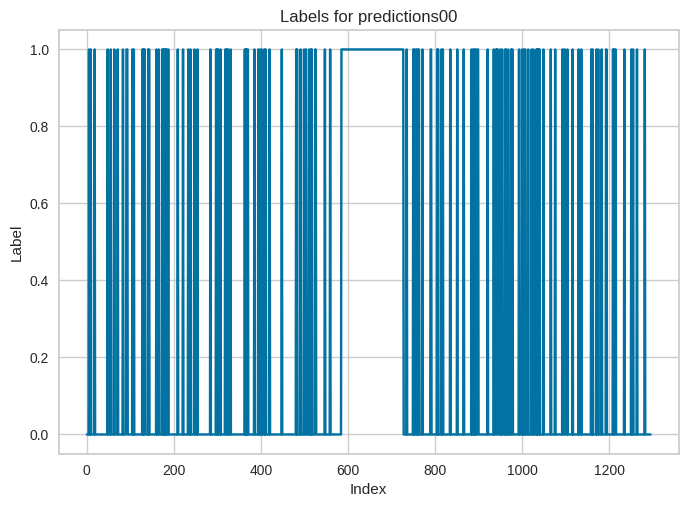

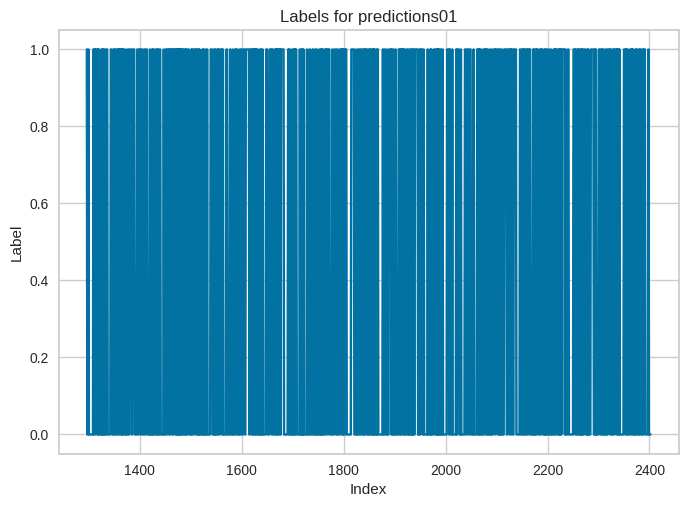

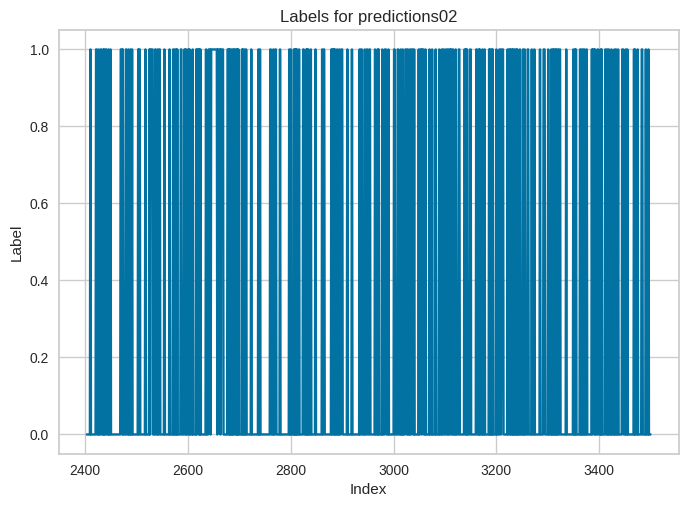

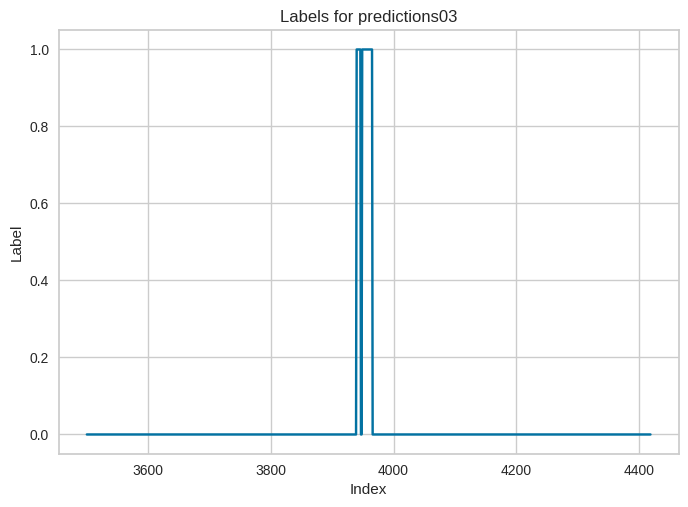

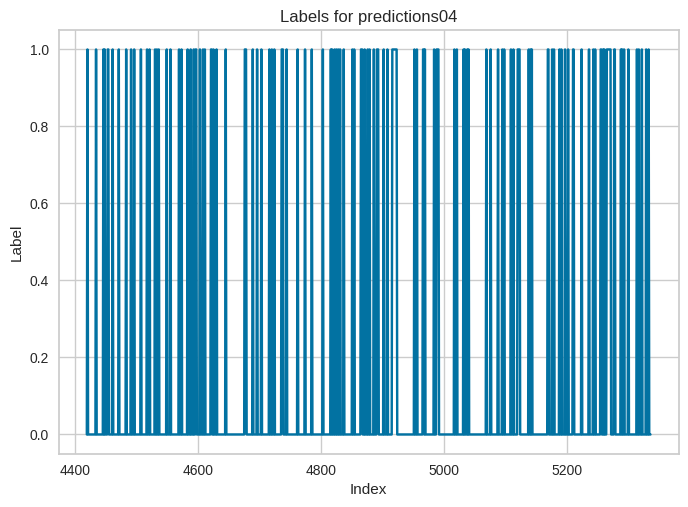

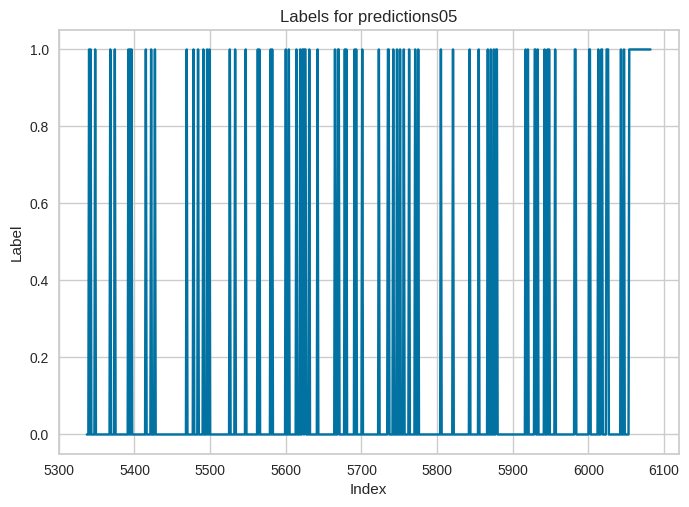

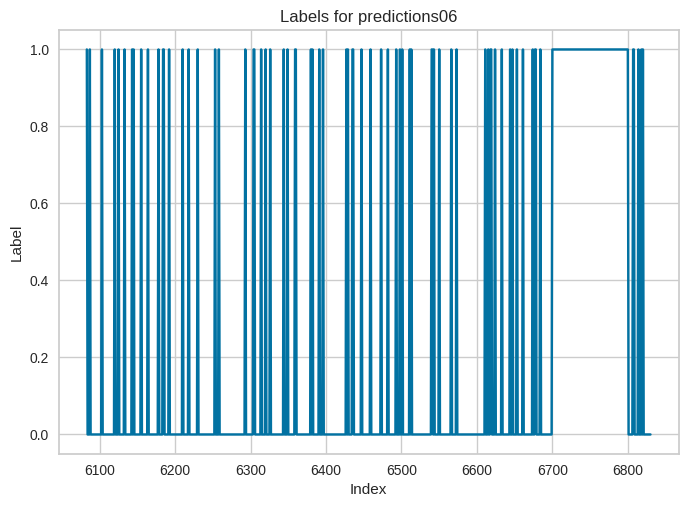

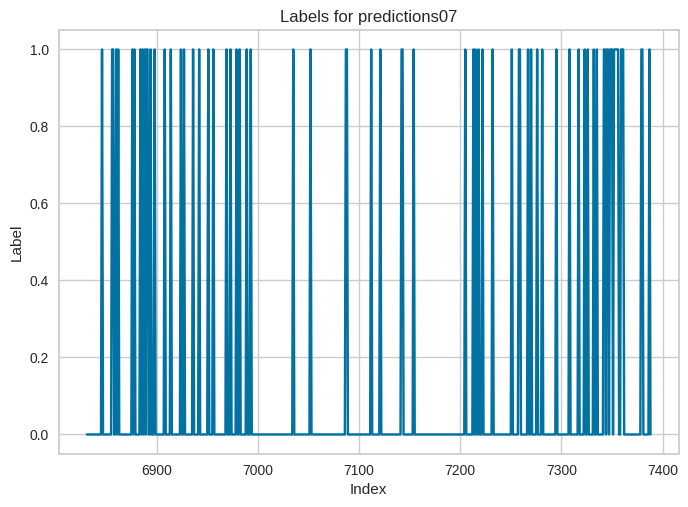

In [ ]:
for i in range(8):
    pred_label = globals()[f'predictions0{i}']['prediction_label']
    #plt.figure(figsize=(8, 6))
    plt.plot(pred_label)
    plt.title(f'Labels for predictions0{i}')
    plt.xlabel('Index')
    plt.ylabel('Label')
    plt.show()

# GAN

In [ ]:
!pip install sdv==0.17.2

In [ ]:
from sdv.tabular import CTGAN
import pandas as pd
import warnings
import joblib
import os
import torch
import os
torch.manual_seed(0)
np.random.seed(0)
gan_model = CTGAN(verbose=True,cuda=True,epochs=10000)
gan_model.fit(train_abnor)
test_gan = gan_model.sample(1000, randomize_samples=0)

In [ ]:
test_gan

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.11,43.79,0.7,20.07,1617.0,64.34,3.20,5,1
1,2.51,58.09,0.7,36.24,3127.0,69.99,3.83,0,1
2,2.18,58.77,0.7,35.27,2989.0,69.59,3.56,0,1
3,1.59,45.01,0.7,25.37,1835.0,58.50,3.24,0,1
4,2.46,59.30,0.7,39.39,3212.0,74.62,3.79,0,1
...,...,...,...,...,...,...,...,...,...
995,2.81,58.56,0.7,41.32,2961.0,75.91,3.98,0,1
996,2.53,53.61,0.7,37.24,2264.0,68.20,3.84,0,1
997,2.72,53.82,0.7,40.24,2952.0,77.36,3.66,0,1
998,1.14,37.77,0.7,18.26,1917.0,60.18,3.17,6,1


In [ ]:
test_gan[test_gan['label'] != 1]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
